# [course page](http://web.stanford.edu/class/physics91SI/cgi-­‐bin/?page_id=947)
[Lab 5 problem](http://www.stanford.edu/class/physics91si/2016/labs/lab05.pdf)

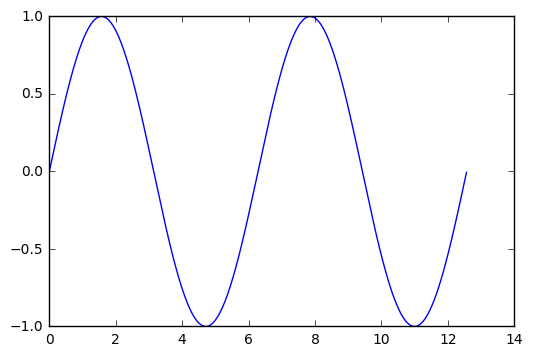

In [41]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x=np.arange(0,np.pi*4,0.01)
y=np.sin(x)
plt.plot(x,y)

In [12]:
# https://helloacm.com/how-to-compute-numerical-integration-in-numpy-python/

def integrate(f,a,b,N):
    x=np.linspace(a,b,N)
    fx=f(x)
    area=np.sum(fx)*(b-a)/N
    return area

In [31]:
integrate(np.sin,0,np.pi,10000)

1.9997999835490143

In [20]:
integrate(np.cos,0,np.pi,100)

6.9757369960172635e-17

In [19]:
integrate(np.tan,0,np.pi/2,100)

256530507880080.16

In [21]:
type(x)

numpy.ndarray

[Google it](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.integrate.trapz.html#scipy.integrate.trapz)

In [40]:
x=np.arange(0,np.pi/2,0.01)
np.trapz(np.sin(x),dx=0.01)

0.99919534657811127

# Cos

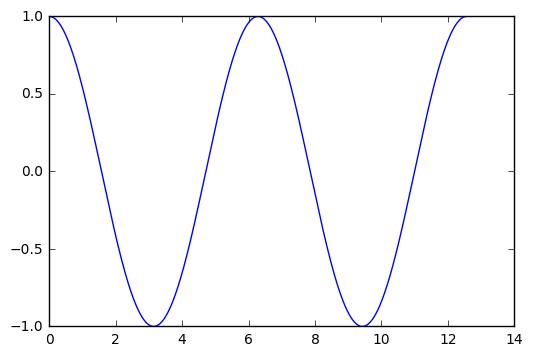

In [37]:
x=np.arange(0,np.pi*4,0.01)
y=np.cos(x)
plt.plot(x,y)

In [39]:
x=np.arange(0,np.pi/2,0.01)
np.trapz(np.sin(x),dx=0.01)

0.99919534657811127

# Data analysis

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [43]:
def wavepacket(x, k, sigma):
    """This function creates a wavepacket on the interval defined by x with
    wavevector k and standard deviation sigma."""
    return np.sin(k*x) *  np.exp(-(x**2)/(2*sigma**2))

In [44]:
def noisy_packet(x_values, k, sigma, noise_amplitude):
    """This function returns a noisy Gaussian wavepacket with wave
    vector k, standard deviation sigma and Gaussian noise of standard
    deviation noise_amplitude."""
    clean_y = wavepacket(x_values,k,sigma)
    noisy_y = clean_y + noise_amplitude*np.random.randn(len(x_values))
    return noisy_y

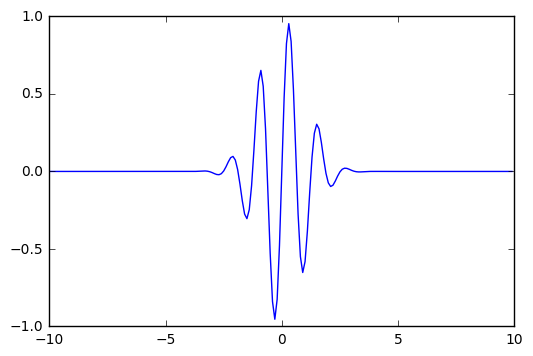

In [71]:
clean_y = wavepacket(x,5,1)
plt.plot(x,clean_y)

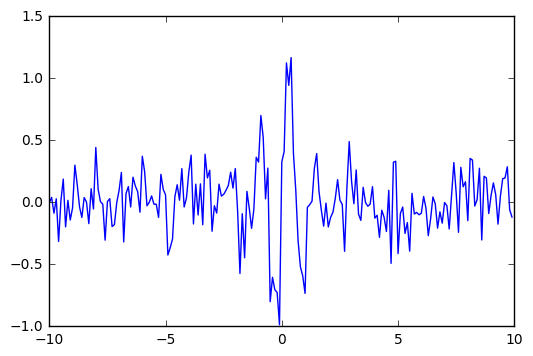

In [46]:
x = np.arange(-10,10,0.1)
y = noisy_packet(x, 5, 1, 0.2)
plt.plot(x,y)
plt.show()

[Google it](http://exnumerus.blogspot.in/2011/12/how-to-remove-noise-from-signal-using.html)

In [81]:
# filter the Fourier transform
def filter_rule(x,freq):
    band = 0.05
    f_signal  = 6
    if abs(freq)>f_signal+band or abs(freq)<f_signal-band:
        return 0
    else:
        return x
    
def clean_data(x_values,y_values):
    """This function should take a set of y_values, perform the Fourier
    transform on it, filter out the high frequency noise, transform the
    signal back into real space, and return it."""
    
    F=np.fft.rfft(y_values)
    f=np.fft.rfftfreq(len(y_values),0.01)
    y_filtered=np.array([filter_rule(x,freq) for x,freq in zip(F,f)])
    y_clean=np.fft.irfft(y_filtered)
    return y_clean

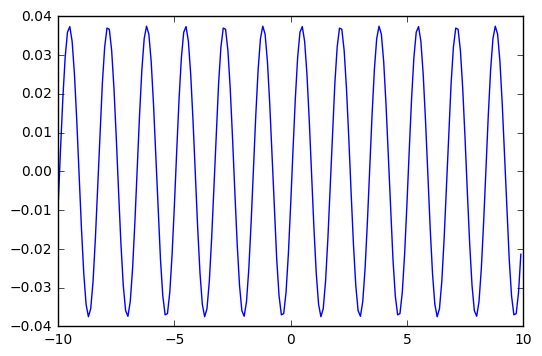

In [82]:
yclean=clean_data(x,y)
plt.plot(x,yclean)
plt.show()